In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Read xlsx files into DF
startups = pd.read_excel('/content/P11-1000-Startups.xlsx')
Financials = pd.read_excel('/content/P11-1000-Startups.xlsx', sheet_name= 'Financials')

In [ ]:
#Joining Dataframes into one DF
data = startups.join(Financials, on = 'ID', how = 'left', rsuffix = '_F')

In [84]:
startups['Avg_no_of_employees'] = startups.groupby('Industry')['Employees'].transform(np.mean).round(0)

In [85]:
startups.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",331.0


In [ ]:
Financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [ ]:
data.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0,9016542.89,804035.40,8212507.49,65.00%,5448571.0,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0,12456641.64,2149297.00,10307344.65,520.00%,2007778.0,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0,7746272.07,1044375.49,6701896.58,317.00%,1857830.0,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01


In [34]:
industries = startups.groupby('Industry').size().sort_values(ascending = False)

In [8]:
industries = pd.DataFrame(industries)

In [9]:
#industries.reset_index(inplace=True)
industries.rename(columns={0:'Number'}, inplace=True)


In [ ]:
industries

Let's find the earliest founded startups each industry

In [18]:
earliest_startups = pd.DataFrame(columns = startups.columns.to_list())

In [ ]:
earliest_startups

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area


In [20]:
industry_grup = startups.groupby('Industry')

In [24]:
# Find the earliest founded startup in each industry
for industry, year in industry_grup:
  the_min_year = year.nsmallest(n=1, columns = 'Year Founded')
  earliest_startups = earliest_startups.append(the_min_year)

In [25]:
# Optional export data to xlsx file
earliest_startups.to_excel('earliest_startups.xlsx')

In [28]:
earliest_startups.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area
291,292,Fintax,Advertising & Marketing,Provides a comprehensive lead serivce package ...,2000,12,IL,Chicago,Chicago
111,112,Keycone,Business Products & Services,Develops online systems that give health insur...,2000,62,CT,Madison,"New Haven-Milford, CT"
56,57,Tindex,Computer Hardware,Provides clients with a streamlined purchasing...,2011,11,MN,Spring Park,Minneapolis


Let's check which industry hire the highest number of employees

In [36]:
indus = startups.groupby('Industry').agg({'Employees': [np.mean, np.sum]})

In [37]:
indus.columns = [x + y.capitalize() for x,y in indus.columns.values]

In [38]:
#indus.reset_index(inplace=True)
indus.rename(columns={'EmployeesMean':'Employees_Mean', 'EmployeesSum':'Employees_Sum'}, inplace=True)

In [39]:
indus.reset_index(inplace = True)

In [33]:
indus['Employees_Mean'] = indus['Employees_Mean'].round(0)

In [ ]:
indus

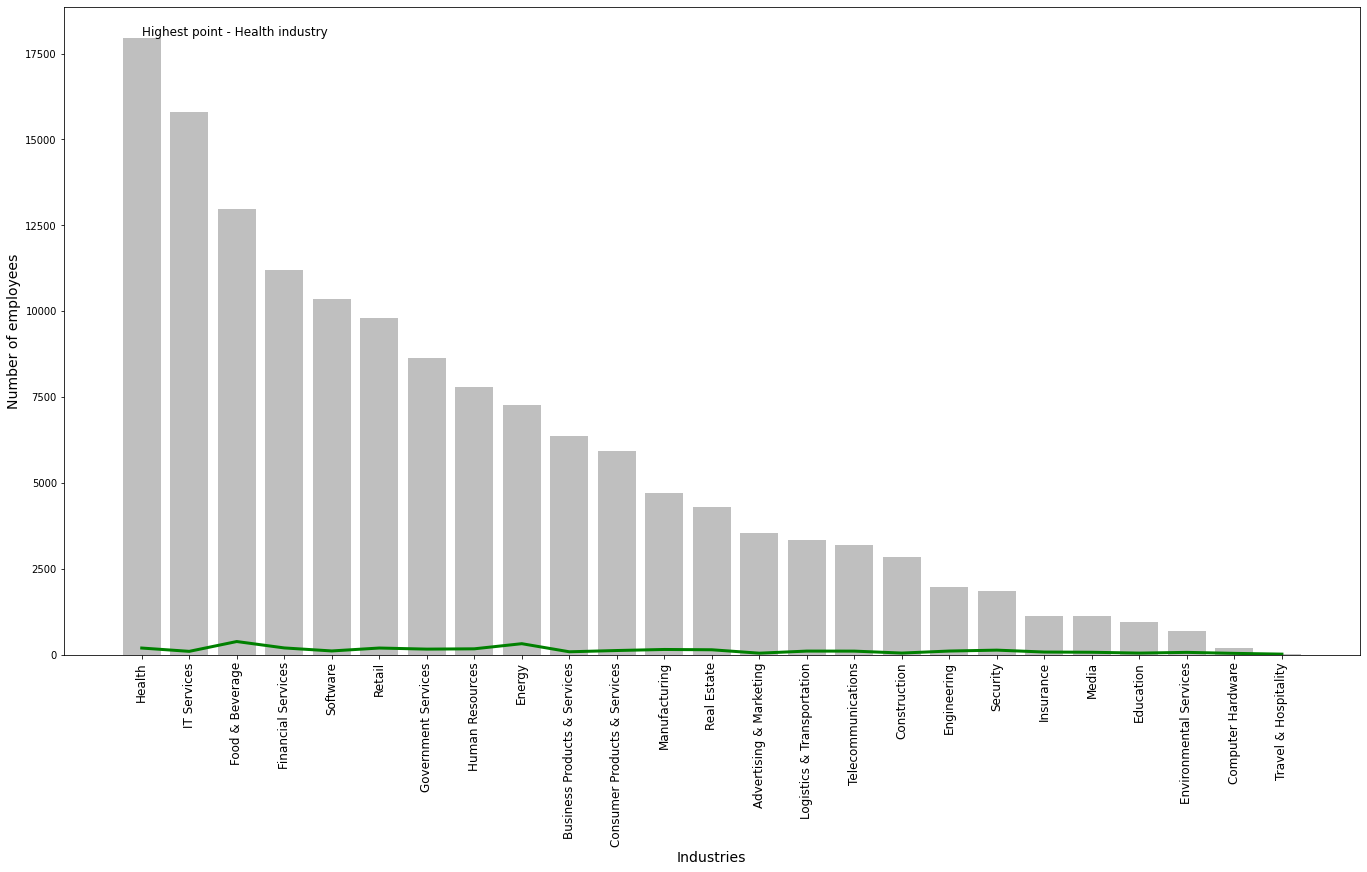

In [113]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])

x1 = indus['Industry']
x2 = indus['Employees_Mean']
x3 = indus['Employees_Sum']
plt.xticks(rotation=90, size = 12) 
plt.ylabel('Number of employees', size = 14)
plt.xlabel('Industries', size = 14)
ax.plot(x1,x2, color = 'g', linewidth=3.0)
ax.bar(x1,x3, color = 'grey', alpha = 0.5)
ax.annotate('Highest point - Health industry', xy = ('Health', 18000), size = 12, color = 'black')
plt.savefig('Chart_basic.png', dpi = 300)

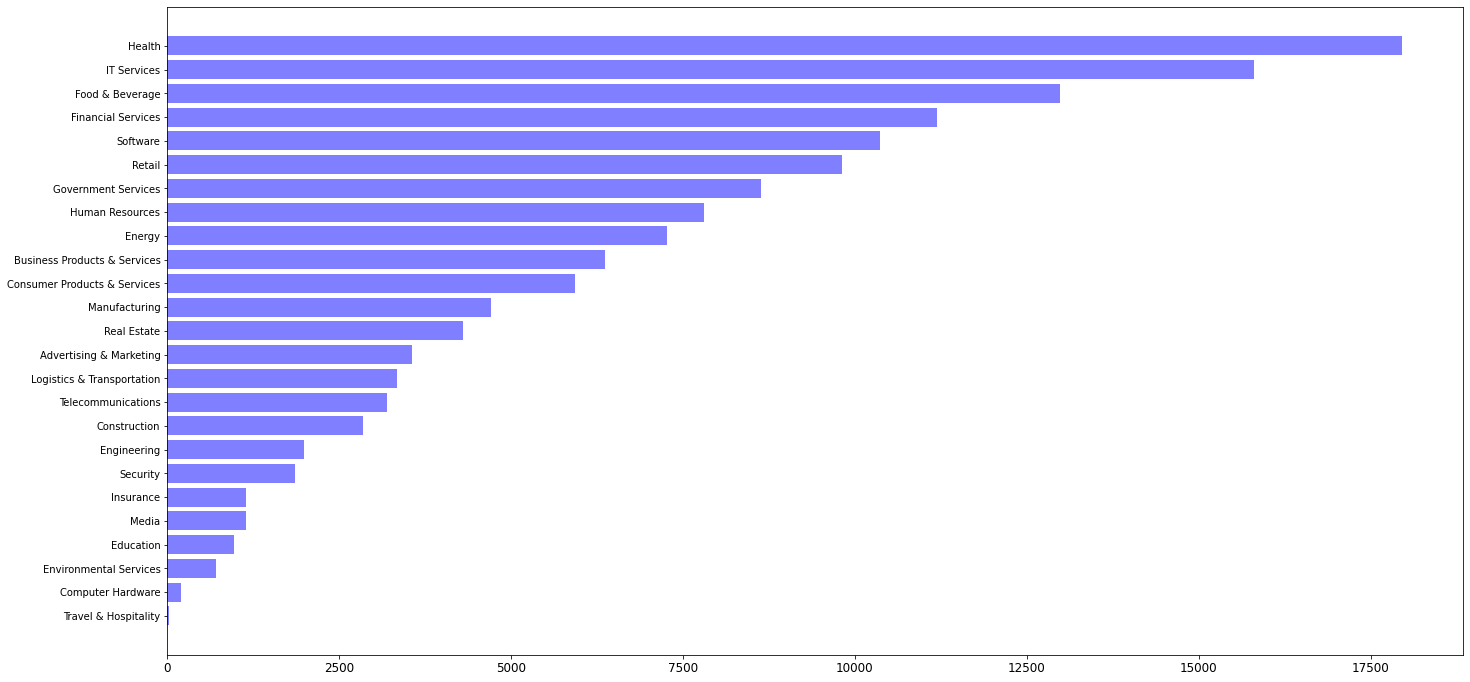

In [119]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
indus.sort_values(by = 'Employees_Sum', ascending=True, inplace = True)

x1 = indus['Industry']
x2 = indus['Employees_Sum']

plt.barh(x1,x2, color = 'blue', alpha = 0.5)
plt.xticks(size = 12)
plt.show()


In [89]:
indus.sort_values(by = 'Employees_Sum', ascending=False)

,Industry,Employees_Mean,Employees_Sum
12,Health,204.022727,17954
14,IT Services,107.517007,15805
10,Food & Beverage,393.393939,12982
9,Financial Services,207.240741,11191
22,Software,119.183908,10369
20,Retail,204.312500,9807
11,Government Services,172.720000,8636
13,Human Resources,181.395349,7800
6,Energy,330.590909,7273
1,Business Products & Services,95.029851,6367


In [ ]:
data.drop(columns = ['ID_F','Name_F'], inplace = True)

In [ ]:
data.info()

In [ ]:
#works but without precises decimals
data['2015 Growth %'] = pd.Series(["{0:,.2f}%".format(val * 100) for val in data['2015 Growth %']], index = data.index)

In [ ]:
data['2014 Growth %'] = data.to_string(formatters={'2014 Growth %': '{:,.2f}'.format})

In [ ]:
data['2014 Growth %'] = pd.Series(["{0:,.2f}".format(val * 100) for val in data['2014 Growth %']], index = data.index)

ValueError: ignored

# Nowa sekcja